Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 16, 16, 27)]      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 256)       7168      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 9)         2313      
Total params: 9,481
Trainable params: 9,481
Non-trainable params: 0
_________________________________________________________________
Stopping due to time-out
Target:


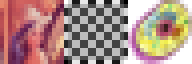

mass at t0: tf.Tensor([255. 255. 255. 255. 255. 255. 255. 255. 255.], shape=(9,), dtype=float32)
mass at tf: tf.Tensor(
[184.16333  101.3191   107.029655 124.91469  125.27439  126.51224
 255.54504  254.64925  168.45226 ], shape=(9,), dtype=float32)
Sample run:


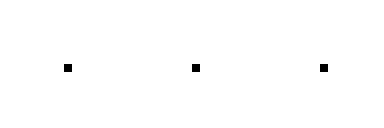


 step: 488, loss: 0.026, log10(loss): -1.580

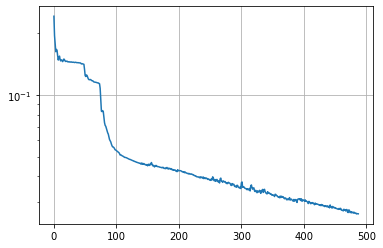

Stopping due to time-out
Target:


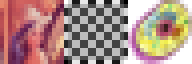

mass at t0: tf.Tensor([255. 255. 255. 255. 255. 255. 255. 255. 255.], shape=(9,), dtype=float32)
mass at tf: tf.Tensor(
[177.81926  96.84809 102.36336 128.8039  127.12421 128.1917  210.16374
 190.39195 166.702  ], shape=(9,), dtype=float32)
Sample run:


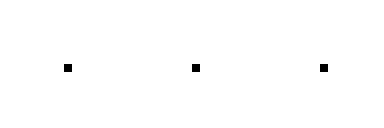


 step: 1098, loss: 0.002, log10(loss): -2.651

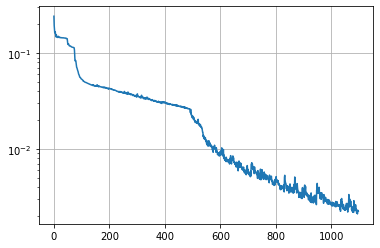

Stopping due to time-out
Target:


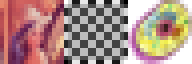

mass at t0: tf.Tensor([255. 255. 255. 255. 255. 255. 255. 255. 255.], shape=(9,), dtype=float32)
mass at tf: tf.Tensor(
[183.10493 100.27403 105.223   127.1249  128.2928  126.82873 208.42824
 192.80403 165.97864], shape=(9,), dtype=float32)
Sample run:


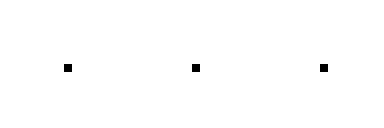


 step: 1730, loss: 0.001, log10(loss): -3.034

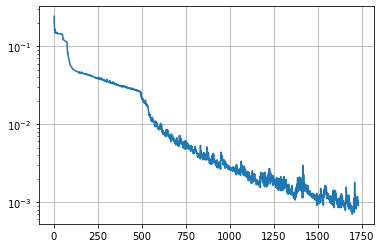

KeyboardInterrupt: 

In [19]:
import module1
from importlib import reload
import random
reload(module1)

ca = module1.CellularAutomata(
    img_size=16, 
    channel_count=9,
    layer_counts=[256],
    perception_kernel=module1.sobel_state_kernel())
ca.edge_strategy = module1.EdgeStrategy.ZEROS

x0 = lambda: ca.pointfilled(ca.constfilled(1.0), 0.0)
xf = lambda: ca.imagestackfilled(["lenna.png", "checkers.png", "microbe.png"])
xf_val = xf()

training = module1.init_training(ca, learning_rate=1.5e-3)

while not training.is_done():
    training.run(x0, xf, 32, max_seconds=60, loss_f=lambda x: module1.loss_all_channels(x, xf_val))
    xs = training.show_sample_run(x0, xf, 32)
    training.show_loss_history()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 28, 28, 9)]       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 3)         771       
Total params: 3,331
Trainable params: 3,331
Non-trainable params: 0
_________________________________________________________________
Stopping due to time-out
Target:


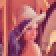

mass at t0: tf.Tensor([783. 783. 783.], shape=(3,), dtype=float32)
mass at tf: tf.Tensor([569.05676 306.39386 338.19833], shape=(3,), dtype=float32)
Sample run:


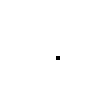


 step: 214, loss: 0.019, log10(loss): -1.730

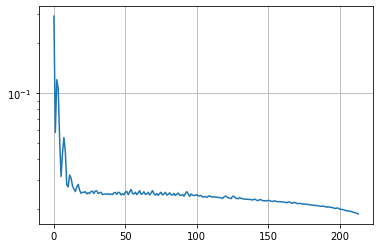

Stopping due to time-out
Target:


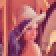

mass at t0: tf.Tensor([783. 783. 783.], shape=(3,), dtype=float32)
mass at tf: tf.Tensor([551.2366  308.41684 310.54056], shape=(3,), dtype=float32)
Sample run:


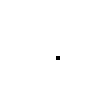


 step: 435, loss: 0.011, log10(loss): -1.944

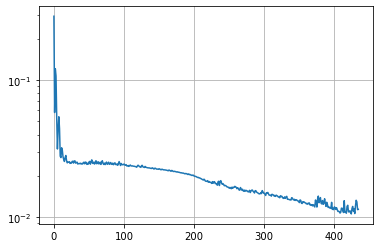

Stopping due to time-out
Target:


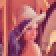

mass at t0: tf.Tensor([783. 783. 783.], shape=(3,), dtype=float32)
mass at tf: tf.Tensor([552.70795 296.7505  324.25986], shape=(3,), dtype=float32)
Sample run:


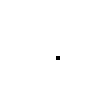


 step: 662, loss: 0.007, log10(loss): -2.130

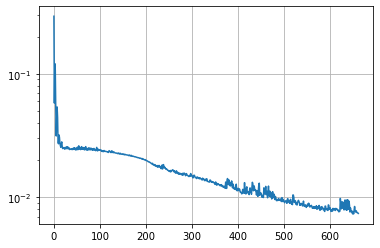

KeyboardInterrupt: 

In [18]:
import module1
from importlib import reload
import random
reload(module1)

ca = module1.CellularAutomata(
    img_size=28, 
    channel_count=3,
    layer_counts=[256],
    perception_kernel=module1.sobel_state_kernel())
ca.edge_strategy = module1.EdgeStrategy.ZEROS

x0 = lambda: ca.pointfilled(ca.constfilled(1.0), 0.0)
xf = lambda: ca.imagefilled("lenna.png")
xf_val = xf()

training = module1.init_training(ca, learning_rate=1.5e-3)

while not training.is_done():
    training.run(x0, xf, 32, max_seconds=60, loss_f=lambda x: module1.loss_mean_square(x, xf_val))
    xs = training.show_sample_run(x0, xf, 32)
    training.show_loss_history()